<img style='float: left;' src='https://www.gesis.org/fileadmin/styles/img/gs_home_logo_en.svg'>

# Generating Networks with Homophily and Preferential Attachment
Author: [Fariba Karimi](https://www.gesis.org/person/fariba.karimi)

Please cite as: Karimi, Fariba (2019). Generating Networks with Homophily and Preferential Attachment. url:[github.com/gesiscss/HomophilyNtwNotebooks](https://github.com/gesiscss/HomophilyNtwNotebooks)

<div class="alert alert-info">
<big><b>Significance</b></big>

The homophilic networks with preferential attachment algorithm generates networks with tunable homophily, group sizes, and preferential attachment. This network model is from a family of growing network models where in each time step one node arrives and attaches to the existing nodes based on the homophily and preferential attachment. The preferential attachment, or rich-get-richer, mechanism resembles the Matthew Effect. Homophily resembles nodes' tendency to attract others with specific intrinsic attributes. For example, in the context of sexual relationship, homophily among people of the same gender is low and in the context of the friendship the homophily among people of the same gender is high. The generative model is minimal and can be applied to explain inequalities that are observed in complex systems.
</div>

### For more information, please visit the following paper

<a href='https://doi.org/10.1038/s41598-018-29405-7'><img style='float: left;' src='images/SciRepKarimi.png' width='500' height='500'></a>

## Introduction

Homophily can put minority groups at a disadvantage by restricting their ability to establish links with a majority group or to access novel information. In our paper ([Karimi et al., 2018](https://doi.org/10.1038/s41598-018-29405-7)), we show how this phenomenon can influence the ranking of minorities in examples of real-world networks with various levels of heterophily and homophily ranging from sexual contacts, dating contacts, scientific collaborations, and scientific citations. We devise a social network model with tunable homophily and group sizes, and demonstrate how the degree ranking of nodes from the minority group in a network is a function of (i) relative group sizes and (ii) the presence or absence of homophilic behaviour. We provide analytical insights on how the ranking of the minority can be improved to ensure the representativeness of the group and correct for potential biases. Our work presents a foundation for assessing the impact of homophilic and heterophilic behaviour on minorities in social networks.

In this study, we focus on two main mechanisms for the formation of ties: homophily ([McPherson et al., 2001](https://doi.org/10.1146/annurev.soc.27.1.415)) and preferential attachment ([Barabási & Albert, 1999](https://doi.org/10.1126/science.286.5439.509)), and systematically study how relative size differences between groups in social networks, with various levels of homophily, impact the ranking of nodes in synthetic and real-world networks. We build on previous models by systematically exploring the parameter range for homophily and group size differences and offer analytical and empirical evidence on the emergent properties of networks and the ranking of groups.

Network generators consist of simple mechanisms or rules on how nodes or links are to be attached to an initial network. One of the most basic mechanisms involves the *rich-get-richer effect* according to which a node's chance to acquire a new link is proportional to the number of links that node already has. Such an effect was described by [Merton (1968)](https://doi.org/10.1126/science.159.3810.56) for the accumulation of reward in the science system and termed the *Matthew Effect*.

[Barabási & Albert (1999)](https://doi.org/10.1126/science.286.5439.509) discovered power-law effects in complex social and technological networks. They introduced a model that formally combines network *growth* and *preferential attachment*, the latter being their term for the rich-get-richer mechanism, to generate undirected random networks with a power-law degree distribution. The so-called BA Model remains one of the most fundamental network generators to date.

One fundamental aspect of many social networks is that they are comprised of individuals with a variety of attributes, such as race, age, educational background, or gender. Commonly, these attributes are distributed unequally in the population. For example, in many schools across the United States and Europe, Asian or Black students form a minority ([Moody, 2001](https://doi.org/10.1086/338954)). Similarly, women are usually a minority in science and engineering ([Jadidi et al., 2018](https://doi.org/10.1142/S0219525917500114)). Additionally, *homophily*, the tendency to associate with similar others, is observed in many social networks, ranging from friendship to marriage to business partnerships. One study has shown that in school friendships, Asians and Blacks are biased towards interacting with their own race at a rate $>7$ times higher than Whites and that homophily has a nonlinear relationship with respect to relative group sizes ([Currarini et al., 2010](https://doi.org/10.1073/pnas.0911793107)).

**In this notebook**, we provide an interactive generator of the homophilic-preferential attachment network model that lets the user explore the effect of parameter settings. In this model, nodes are assigned a binary attribute that resembles their group membership. These attributes can be distributed equally or unequally in the network. The probability of a new arrival node $j$ to attach to an existing node $i$ is based on the degree of the existing node $k_i$ (preferential attachment) and the homophily between $i$ and $j$, $h_{ij}$:

$$ p_{ij}=\frac{h_{ij} k_i}{\sum_i{h_{ij} k_i}} $$

In addition, we let the user explore how homophily affects degree growth of minorities and majorities.

## Dependencies and Settings

In [1]:
import ipywidgets
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random as rd
import warnings

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
warnings.filterwarnings('ignore')

## Model

``homophilic_ba_graph(N, m, minority_fraction, homophily)`` is the main function to generate the network. This function can be called from ``generate_homophilic_graph_symmetric.py``. 

``N`` sets the size of the desired network (number of nodes). ``m`` is the number of nodes an arriving note connects to. It has been proved mathamatically that $m$ does not affect the structural properties of the network. ``minority_fraction`` is the minortiy fraction that can range from 0 to 0.5. ``homophily`` is the parameter that determines the tendency between two nodes to be connected. The homophily parameter ranges from 0 to 1.

In [3]:
from generate_homophilic_graph_symmetric import homophilic_ba_graph

### Explore the model

Adjust the sliders to see the effect of parameter changes.

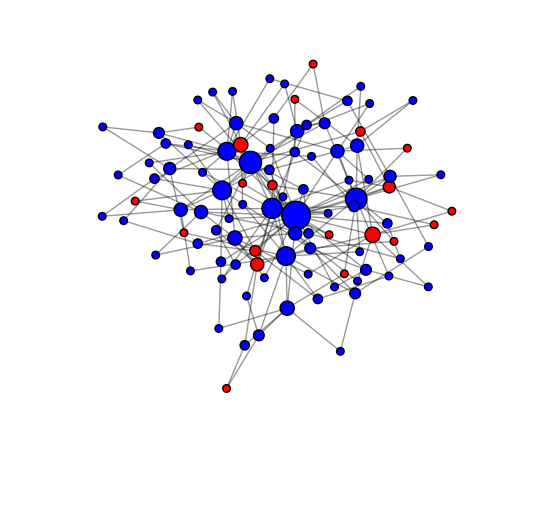

<function __main__.network>

In [4]:
def network(N, m, minority_fraction, homophily):
    G = homophilic_ba_graph(N = N, m = m, minority_fraction = minority_fraction, homophily = homophily)
    
    color = nx.get_node_attributes(G, 'color')
    d = dict(G.degree)
    
    pos = nx.spring_layout(G, k = 0.25) # k: optimal distance between nodes
    
    plt.figure(figsize=(6, 6))
    nx.draw_networkx_edges(G, pos = pos, alpha = 0.4)
    nx.draw_networkx_nodes(G, pos = pos, nodelist = color.keys(),
                           node_size = [v * 15 for v in d.values()],
                           node_color = list(color.values()),
                           cmap=plt.cm.Reds_r)
    
    plt.axis('off')
    plt.show()

ipywidgets.interact(network,
                    N=ipywidgets.IntSlider(value=100, min=10, max=200, step=10),
                    m=ipywidgets.IntSlider(value=2, min=1, max=5, step=1),
                    minority_fraction=ipywidgets.FloatSlider(value=0.2, min=0., max=0.5, step=0.1),
                    homophily=ipywidgets.FloatSlider(value=0.5, min=0., max=1., step=0.1))

### Degree dynamics

The degree growth for the minority group $a$ as well as the majority group $b$ changes over time as

$$ k(t) \propto t^{\beta}. $$

$\beta$ is the exponent of the degree growth and has the following relation with homophily $h$ and group size $f$:

$$ \beta_a = \frac{f_ah}{hC + (1-h)(2-C)} + \frac{f_b(1-h)}{(1-h)C + h(2-C)} $$

$C$ is a multinomial function with 3 roots where only one root is accepted. The ``analytical_prediction()`` function below calculates the values of $\beta_a$ and $\beta_b$ analytically.

In [5]:
def analytical_prediction(homophily, minority_fraction):
    # group a is the minority
    pa = minority_fraction #equal to min fraction
    pb = 1-pa
    
    daa = homophily
    dab = 1 - daa
    
    A = -1
    B = 2 + 2*pa*daa - pa*dab - dab*pb + 2*dab 
    C = -4*pa*daa + 2*pa*dab - 4*dab - 2*daa*dab*pa + 2*(dab**2)*pb
    D = +4*daa*dab*pa
    
    p = [A, B, C, D]
    
    ca = np.roots(p)[1] #only one root is acceptable
    
    beta_a = (daa*pa*(2-ca) + ca *dab*pb) / (ca*(2-ca))
    beta_b = 1 - (pb*(1-beta_a))/(2 - 2*beta_a-pa)
    
    return beta_a, beta_b

### Comparison of numerical and analytical analysis

Now we compare degree growth of the generative model (colored dots) to the analytical solution (lines) for a homophily value $h$ that can be specified. $N=5000$, $m=2$, and $f_a=0.2$ are fixed. Because it takes rather long to generate networks with 5000 nodes, growth data is loaded from a file.

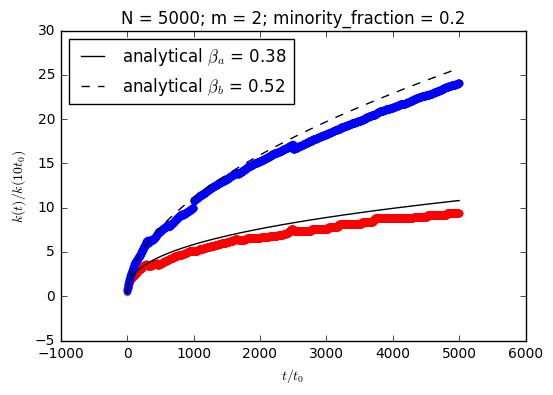

<function __main__.degree_growth>

In [6]:
# IS m=2 CORRECT?

# X DOESN'T DISPLAY x_0, DOES IT?

def degree_growth(homophily):
    N = 5000
    minority_fraction = 0.2
    
    minority_file = open('degree_growth/minority_deg_f_0.2_sim_'+str(homophily)+'.txt', 'r')
    majority_file = open('degree_growth/majority_deg_f_0.2_sim_'+str(homophily)+'.txt', 'r')
    
    x = []
    y_min = []
    for line in minority_file:
        t, avg_deg = line.split(',')
        y_min.append(float(avg_deg))
        x.append(int(t))
    
    plt.scatter(x, y_min, color = 'r', alpha = 0.4)
    
    y_maj = []
    for line in majority_file:
        t, avg_deg = line.split(',')
        y_maj.append(float(avg_deg))
    
    plt.scatter(x, y_maj, color = 'b', alpha = 0.4)
    
    ##### prediction #####
    beta_min, beta_maj = analytical_prediction(homophily, minority_fraction)
    
    x = np.arange(1, N)
    offset_min = 10**(-beta_min)
    
    predicted_value = (x**beta_min) * offset_min
    
    plt.plot(x, predicted_value, label=r'analytical $\beta_a$ = %.2f'%beta_min, linestyle='-', color='black')
    
    offset_maj = 10**(-beta_maj)
    
    predicted_value = (x**beta_maj) * offset_maj
    
    plt.plot(x, predicted_value, label=r'analytical $\beta_b$ = %.2f'%beta_maj, linestyle='--', color='black')
    
    #plt.xlim(10, 100)
    #plt.ylim(1, 10)
    #plt.yscale('log')
    #plt.xscale('log')
    
    plt.title('N = 5000; m = 2; minority_fraction = %s'%minority_fraction)
    plt.ylabel(r"$k(t)/k(10 t_0)$")
    plt.xlabel(r"$t/t_0$")
    plt.legend(loc='upper left')
    
    plt.show()

ipywidgets.interact(degree_growth,
                    homophily=ipywidgets.SelectionSlider(value=0.8, options=[0., 0.2, 0.5, 0.8, 1.]))

## Literature
Barabási, A.-L. & Albert, R. (1999). Emergence of scaling in random networks. *Science*, *286*(5439), 509–512. doi:[10.1126/science.286.5439.509](https://doi.org/10.1126/science.286.5439.509)

Currarini, S., Jackson, M. O., & Pin, P. (2010). Identifying the roles of race-based choice and chance in high school friendship network formation. *Proceedings of the National Academy of Sciences*, *107*(11), 4857–4861. doi:[10.1086/338954](https://doi.org/10.1086/338954)

Karimi, F., Génois, M., Wagner, C., Singer, P., & Strohmaier, M. (2018). Homophily influences ranking of minorities in social networks. *Scientific Reports*, *8*(1), 1–12. doi:[10.1038/s41598-018-29405-7](https://doi.org/10.1038/s41598-018-29405-7)

Jadidi, M., Karimi, F., Lietz, H., & Wagner, C. (2018). Gender disparities in science? Dropout, productivity, collaborations and success of male and female computer scientists. *Advances in Complex Systems*, *21*(03n04), 1750011. doi:[10.1142/S0219525917500114](https://doi.org/10.1142/S0219525917500114)

McPherson, M., Smith-Lovin, L. & Cook, J. M. (2001). Birds of a feather: Homophily in social networks. Annual Review of Sociology*, *27*, 415–444. doi:[10.1146/annurev.soc.27.1.415](https://doi.org/10.1146/annurev.soc.27.1.415)

Merton, R. K. (1968). The Matthew Effect in science. *Science*, *159*(3810), 56–63. doi:[10.1126/science.159.3810.56](https://doi.org/10.1126/science.159.3810.56)

Moody, J. (2001). Race, School Integration, and Friendship Segregation in America. *American Journal of Sociology*, *107*(3), 679–716. doi:[10.1086/338954](https://doi.org/10.1086/338954)